# A origem dos Jogadores ⚽

## 1. Introdução

### 1.1 Motivação do Trabalho

Para conhecimento prévio, o projeto, “A Origem dos Jogadores”, tem como inspiração nominal, o livro do Biólogo, Naturalista e Geólogo, Charles Darwin, “A Origem das Espécies”. A análise feita por Darwin foi: animais da mesma espécies podem ramificar em subespécies a partir do contexto geológico e alimentar de uma região? Charles, em quinhentas páginas, explica esse fenômeno e o intitula como: seleção natural. Diante disso, o grupo composto por: José Hermano; Júlia Moraes; Luiz Eduardo e Tiago Petrucci, decidiu nomear o projeto como, “A Origem dos Jogadores”, pois, os jogadores serão analisados em um escopo geral: em todas as posições jogadas; por setores, defensivo, meio-campista e atacante; e em casos individuais específicos, assim também como Darwin fez, em certa maneira, com os estudos oriundos do Arquipélago de Colón e de outras partes do Mundo.

### 1.2 Objetivos da Análise

Nosso grupo têm como objetivos da análise, responder as seguintes perguntas. Qual é o comportamento das posições antagônicas, ou seja, como as características específicas dos jogadores como, por exemplo, goleiros e atacantes, que “teoricamente” são funções opostas dentro do campo. Um visa defender o gol, enquanto, o outro busca fazê-lo. Como se comportam estatisticamente? Hão mais finalizadores ou defensores? Pode enquadrar também os: pontas e laterais, e zagueiros e meias. Quais ou qual é a característica mais importante para um jogador possuir? Quais são, estatisticamente, os melhores jogadores por posição, e também, por característica específica, ou seja, qual é o melhor driblador, baseado completamente em dados? Essas e outras perguntas podem ser respondidas com os dados coletados no projeto.

## 2. Sobre o Dataset

### 2.1 Descrição do Dataset

### 2.2 Exploração Inicial dos Dados

*Importando as Bibliotecas necessárias para trabalhar com o dataset*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

#Importando as funções criadas por nós
import funcoes as fun

Importando o dataset 

In [2]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

## 3. Pré-processamento do Dataset

### 3.1 Limpeza e tranformação dos dados

#### 3.1.1 Limpeza dos dados

In [3]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


None

Não existem valores nulos no nosso dataset.Então não se faz necessária a limpeza nesse aspecto.

#### 3.1.2 Divindo o Dataset por categoria

Fazendo a divisão do Dataset por categorias, selecionando as habilidades mais relevantes por setor.

**Categoria Defensiva**

A categoria defensiva engloba os jogares responsáveis por defender e recuperar a posse da bola. Ela busca, portanto diminuir a amplitude da equipe adversária.

Essa categoria engloba os goleiros, os zagueiros, os laterais e os alas defensivos. 

Para os laterais a velocidade foi considerada como atributo principal, tendo em consideração a necessidade deles em acompanhar os adversários. 

Para os zagueiros foi eleito a noção defensiva, levanndo em consideração sua responsabilidade de proteger a área, impedindo o avanço dos adversários.

Já nos goleiro os reflexos foram atribuídos como habilidade de maior impacto no desempenho.

In [4]:
#Filtrando para que o dataset pegue todas as colunas que contenham ao menos uma dessas posições
busca = "GK|CB|LB|RB|LWB|RWB"

defense_players = data[data["player_positions"].str.contains(busca)]

In [5]:
#Filtrando as categorias importantes
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41
180018,15.0,"LM, LB",P. Żemło,58,54,9,40


**Categoria de Meio-Campo**

A categoria Meio-Campo engloba os jogares responsáveis pelo jogo rodar.
São parte dela os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.

Para os volantes, meia-centrais e meia-atacantes o passe curto é o atributo mais importante, já que eles são os maiores responsáveis por distribuir os passes. 


Para os meias-abertos, o drible foi considerado um fator de destaque, pois, assim como os pontas, eles frequentemente realizam jogadas individuais

In [6]:
busca = "CDM|LM|RM|CM|CAM"

midfield_players = data[data["player_positions"].str.contains(busca)]

In [7]:

midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
2,24.0,"CM, CAM",K. De Bruyne,94,87.0,91
3,24.0,"CF, CAM",L. Messi,91,94.0,90
10,24.0,"CDM, CM",Rodri,89,80.0,89
14,24.0,CDM,Casemiro,84,73.0,89
17,24.0,"CM, RW",F. Valverde,87,84.0,88
...,...,...,...,...,...,...
180009,15.0,"LM, ST",L. Davies,37,46.0,43
180012,15.0,"CM, CDM, RM",M. Palmer,44,38.0,42
180014,15.0,CM,M. Maier,47,45.0,42
180018,15.0,"LM, LB",P. Żemło,40,31.0,40


**Categoria Ataque**

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, o drible é a característica de destaque pois, assim como os meia-abertos, eles praticam mais jogadas individuais. Tendo a diferença de que os pontas se destacam pelo drible, jogando principalmente nas laterais para cruzamentos, enquanto os meias-abertos tendem a operar centralmente, participando mais da construção das jogadas.

Para os centroavantes e segundo-atacantes a finalização é o principal, já que eles têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [8]:
busca = "LW|ST|RW|CF"

attack_players = data[data["player_positions"].str.contains(busca)]

In [9]:

attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
0,24.0,"ST, LW",K. Mbappé,94,92.0,91
1,24.0,ST,E. Haaland,96,80.0,91
3,24.0,"CF, CAM",L. Messi,89,94.0,90
4,24.0,"CF, ST",K. Benzema,91,87.0,90
5,24.0,ST,R. Lewandowski,93,87.0,90
...,...,...,...,...,...,...
179967,15.0,ST,S. Austin,48,48.0,46
179989,15.0,"ST, RW",J. Allen,45,47.0,45
179996,15.0,ST,A. Peterson,29,53.0,45
180009,15.0,"LM, ST",L. Davies,50,46.0,43


## 4. Desenvolvimento

### 4.1 Boxplt das Posições Por Habilidade ao longo dos anos

#### 4.1.1 Categoria Defensiva

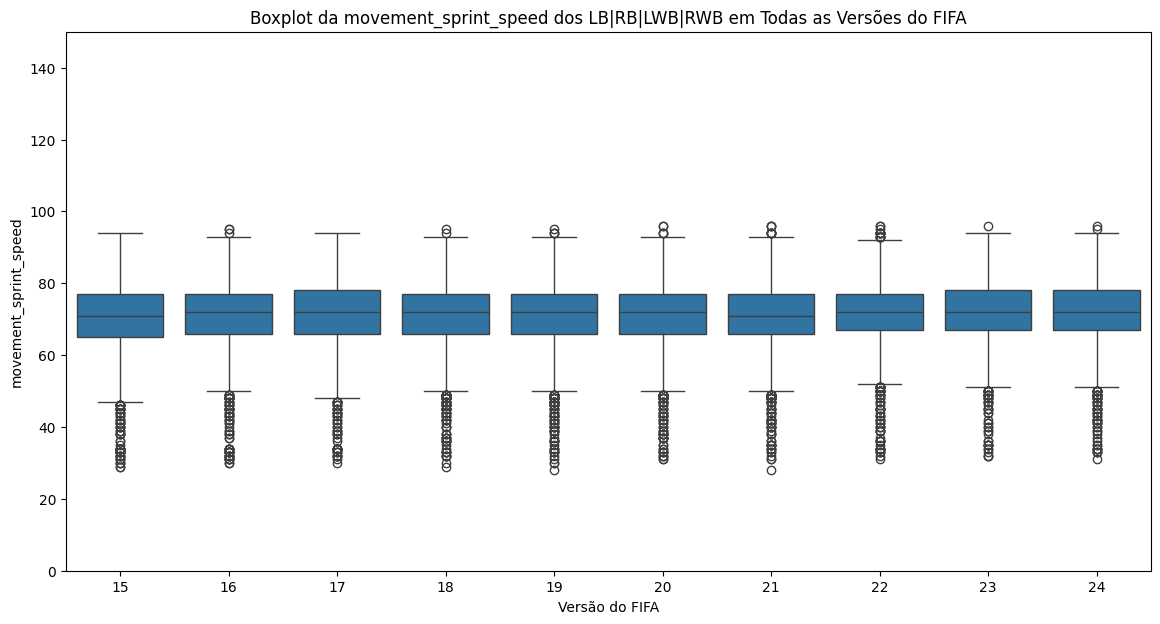

In [132]:

BoxAttribbutes(defense_players, "LB|RB|LWB|RWB", "movement_sprint_speed")


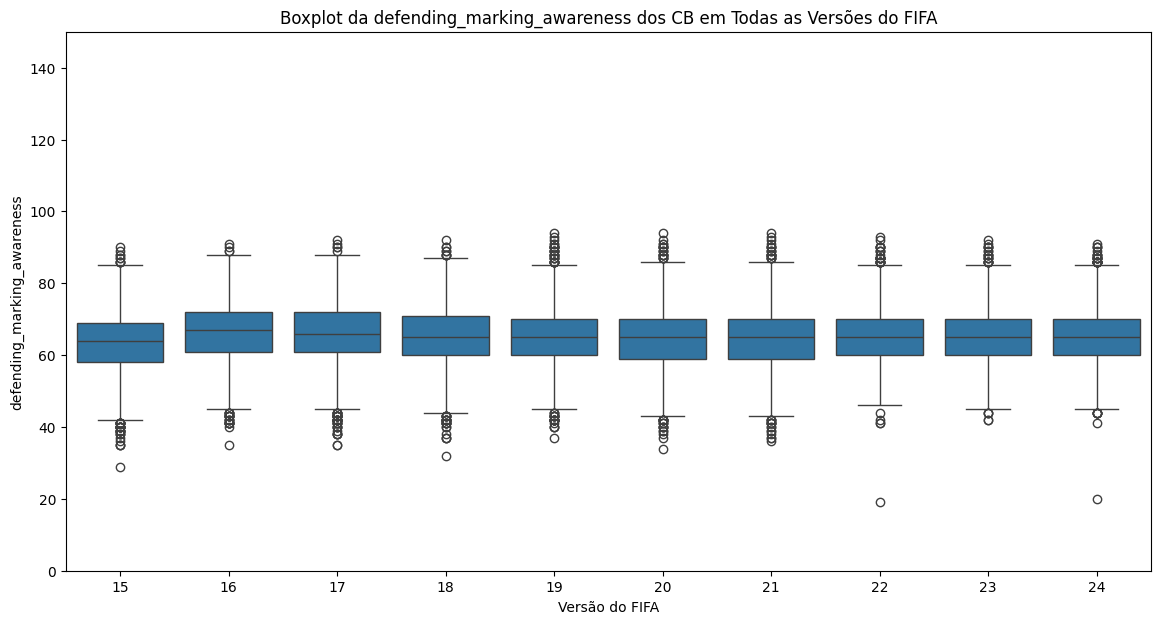

In [133]:
BoxAttribbutes(defense_players,"CB", "defending_marking_awareness")

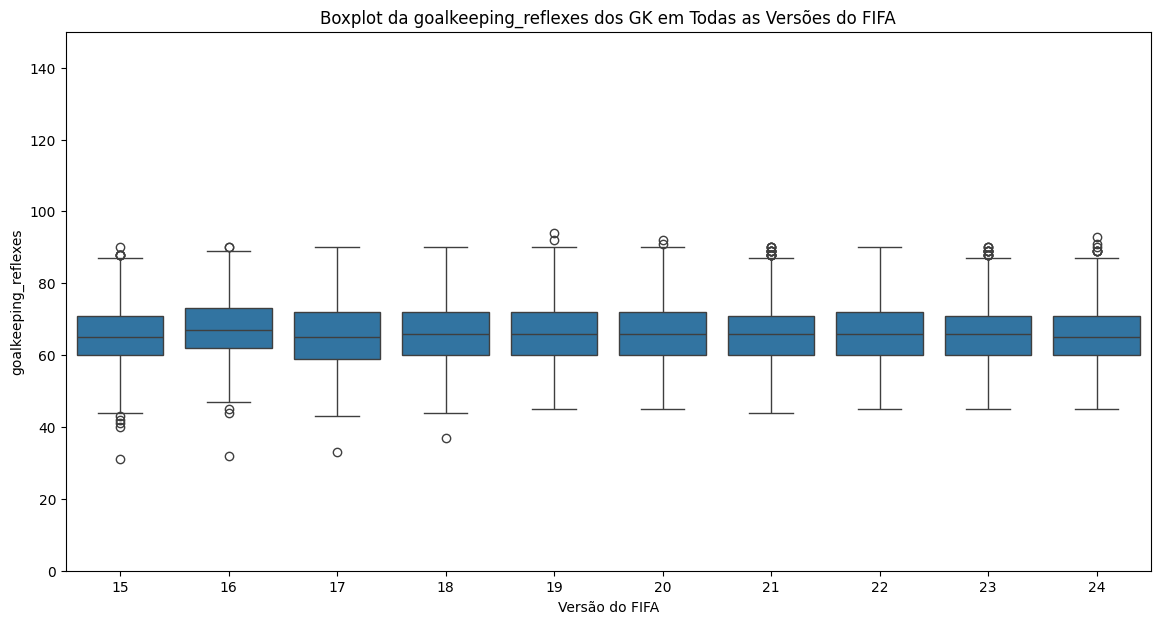

In [134]:
BoxAttribbutes(defense_players,"GK", "goalkeeping_reflexes")

#### 4.1.2 Categoria Meio-Campo

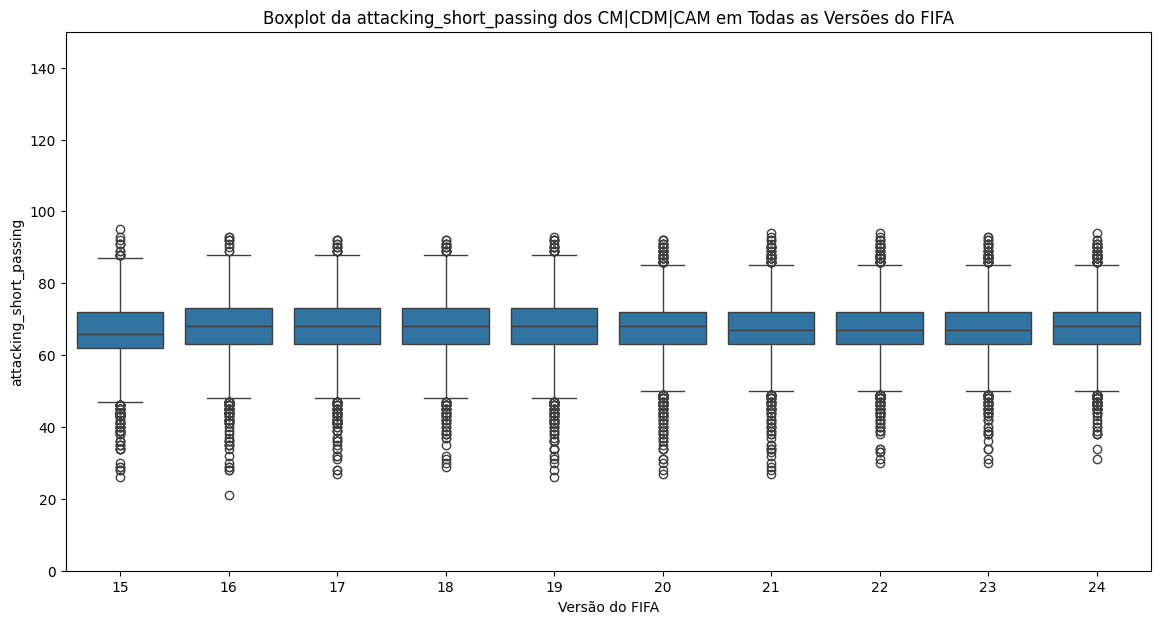

In [135]:
BoxAttribbutes(midfield_players,"CM|CDM|CAM","attacking_short_passing")

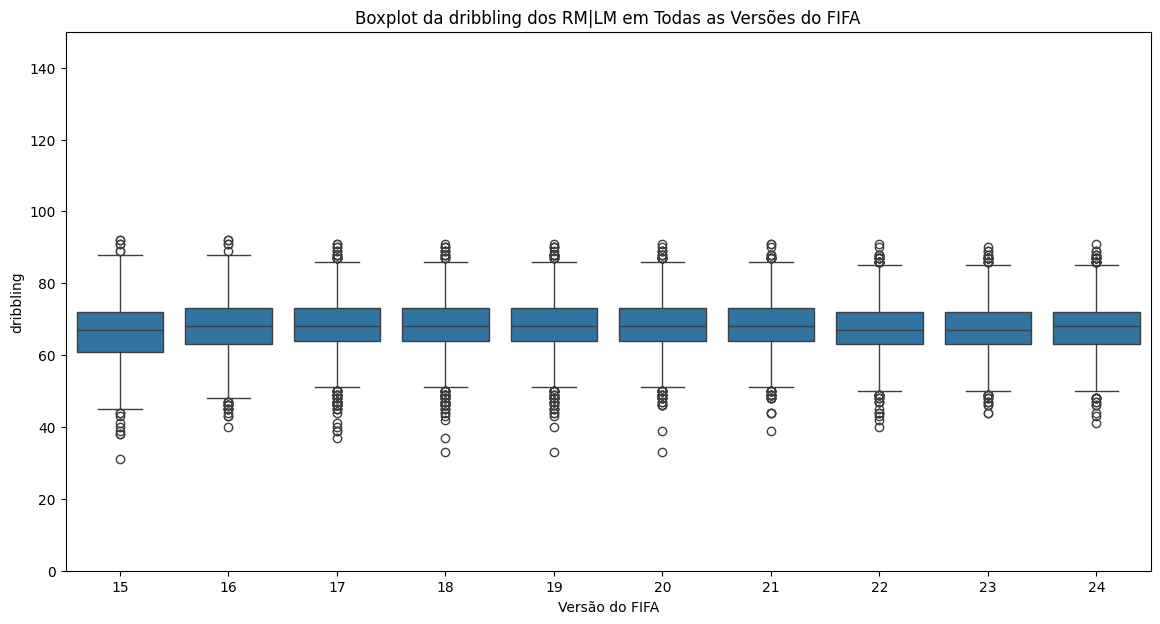

In [136]:
BoxAttribbutes(midfield_players, "RM|LM","dribbling")

#### 4.1.3 Categoria Ataque

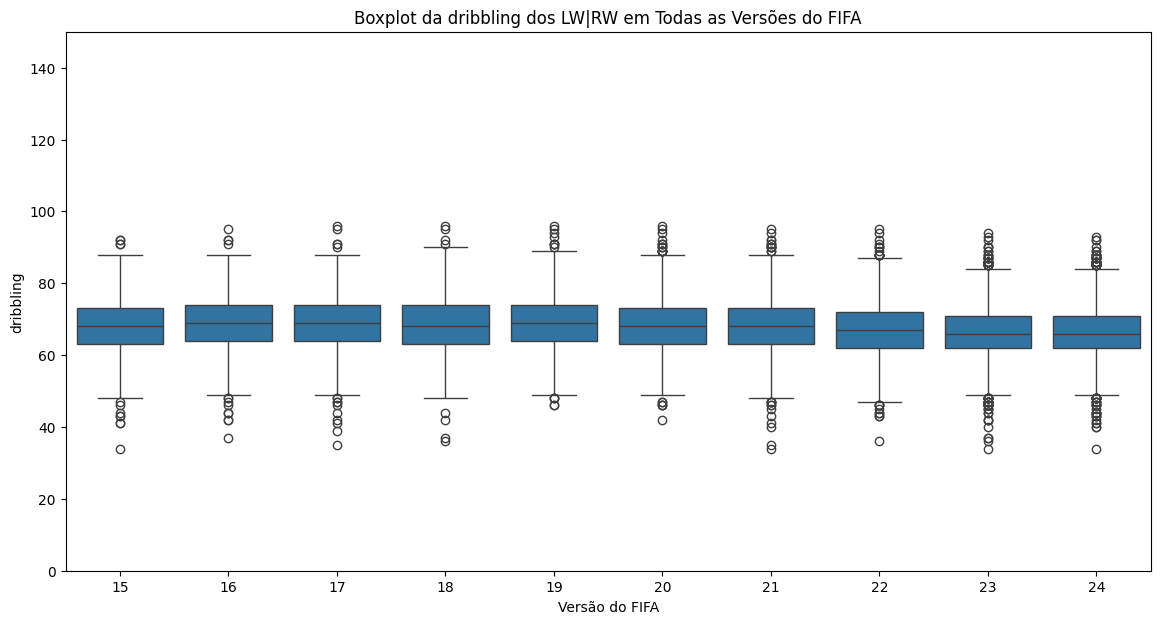

In [137]:
BoxAttribbutes(attack_players,"LW|RW","dribbling")

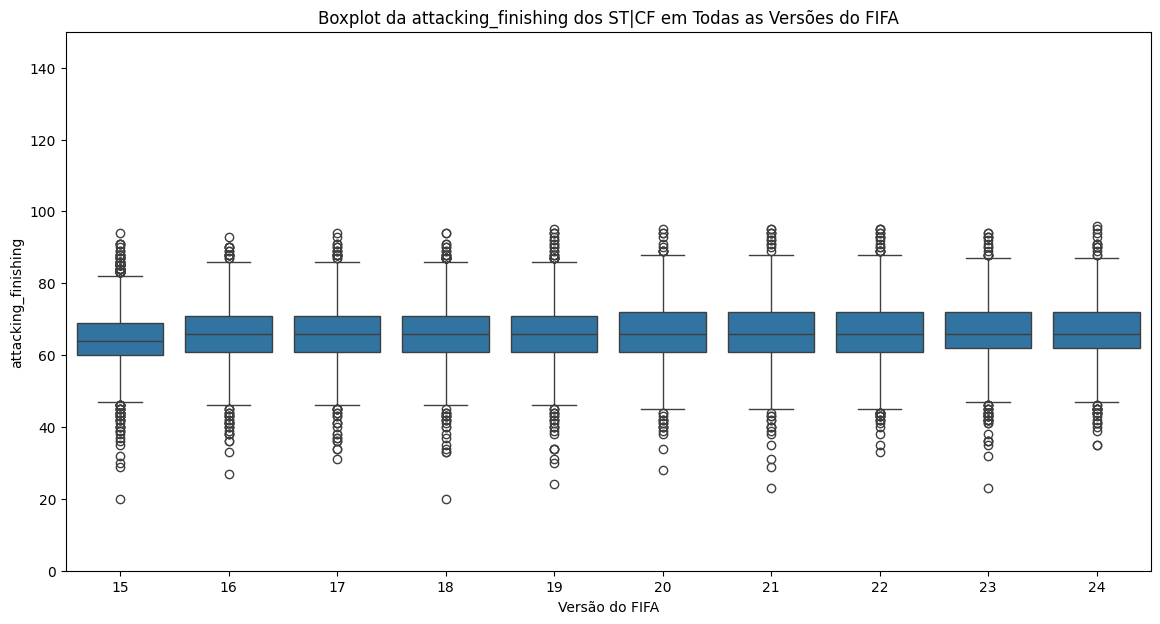

In [138]:
BoxAttribbutes(attack_players,"ST|CF","attacking_finishing")

### 4.2 Média Geral entre os setores

Comparando a média entre os setores, descobri qual tem os jogadores com maiores overall.

In [10]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

<function matplotlib.pyplot.show(close=None, block=None)>

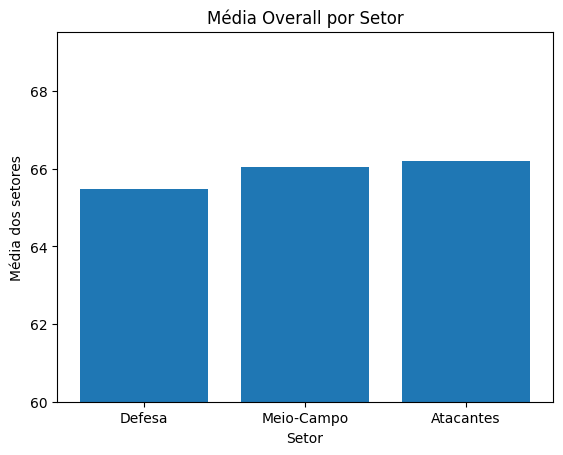

In [11]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')

#Facilitar a visualição das diferenças de níveis entre eles
plt.ylim(60,None)
plt.show

Analisando esse gráfico, podemos observar que o setor defensivo possui a maior média de overall.

### 4.3 Constância entre os setores

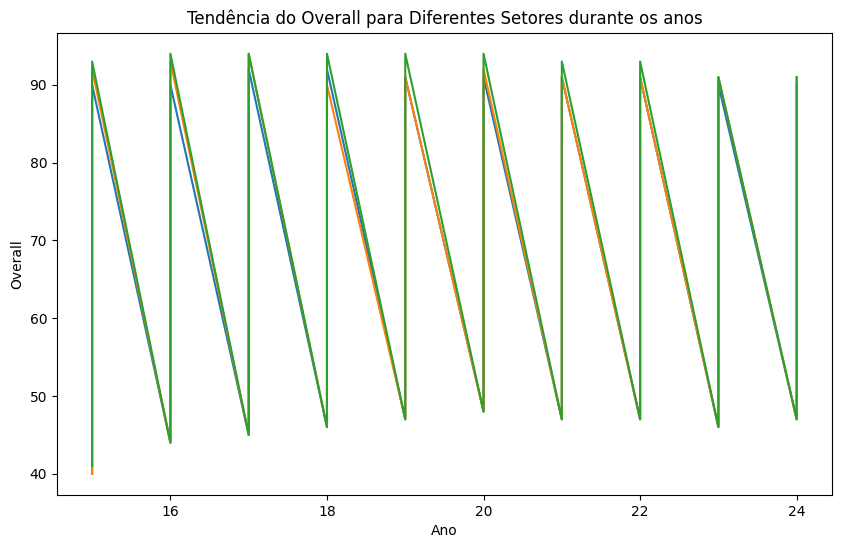

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(defense_players['fifa_version'],defense_players['overall'],label='Jogadores da Defesa')
ax.plot(midfield_players['fifa_version'],midfield_players['overall'],label='Jogadores de Meio-Campo')
ax.plot(attack_players['fifa_version'],attack_players['overall'],label='Jogadores de Ataque')

ax.set_xlabel('Ano')
ax.set_ylabel('Overall')
ax.set_title('Tendência do Overall para Diferentes Setores durante os anos')

plt.show()

### 4.4 Evolução das Habilidades ao longo dos Anos

#### 4.4.1. Centroavantes 

In [13]:
#Chamando a função para pegar os melhores 500 atributos por ano 
attack_finishing_df = fun.ComparePlayers("ST", attack_players, "attacking_finishing")

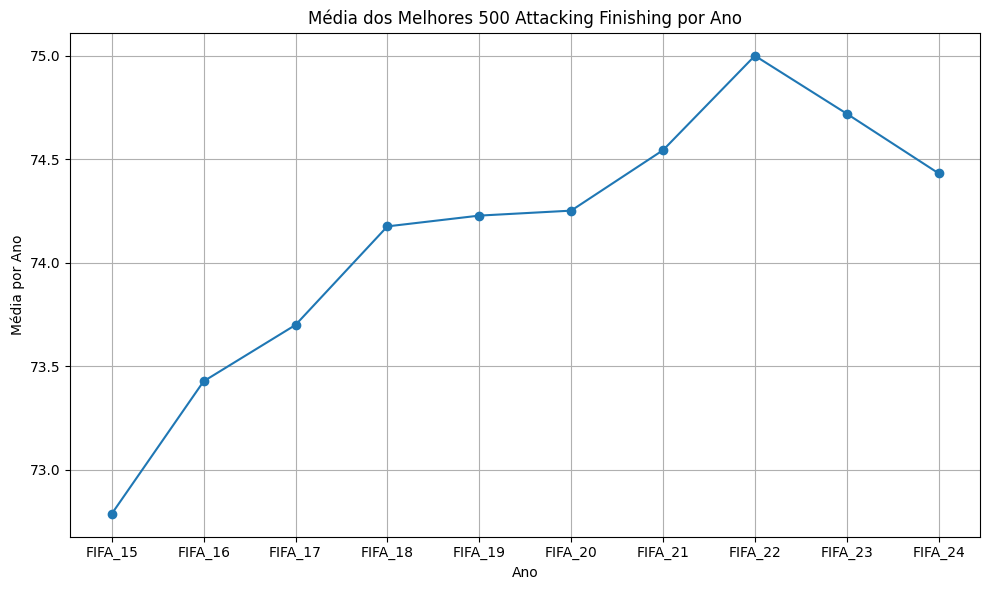

In [17]:
#Gráfico com mostrando a evolução durante os anos 
fun.PlotLineGraph(attack_finishing_df, "Attacking Finishing")


#### 4.4.2. Goleiros

In [18]:
goal_reflexes_df = fun.ComparePlayers("GK", defense_players, "goalkeeping_reflexes")

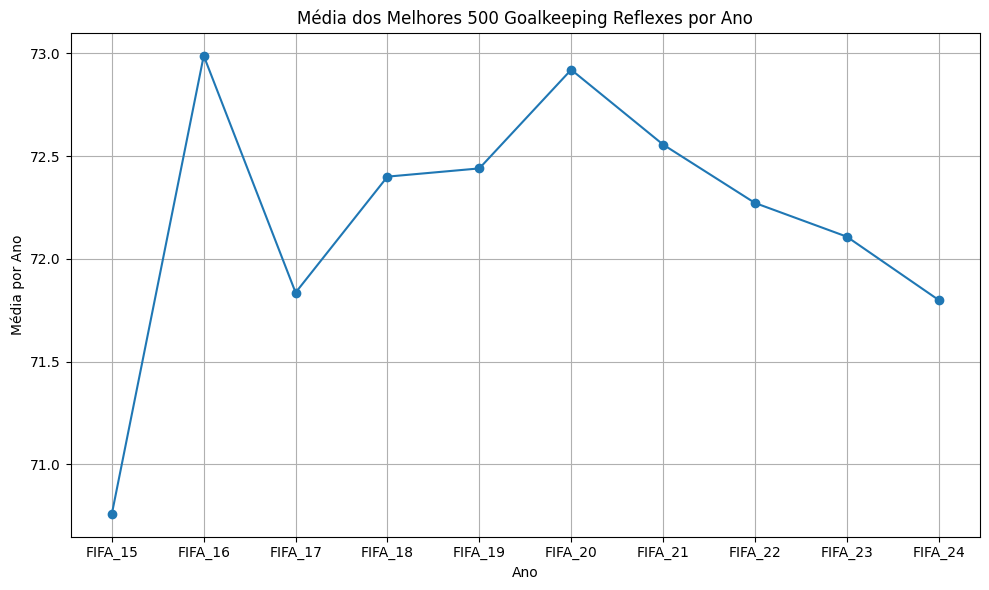

In [20]:
fun.PlotLineGraph(goal_reflexes_df, "Goalkeeping Reflexes")

#### 4.4.3. Zagueiro

In [21]:
nocao_defensiva_df = fun.ComparePlayers("CB", defense_players, "defending_marking_awareness")

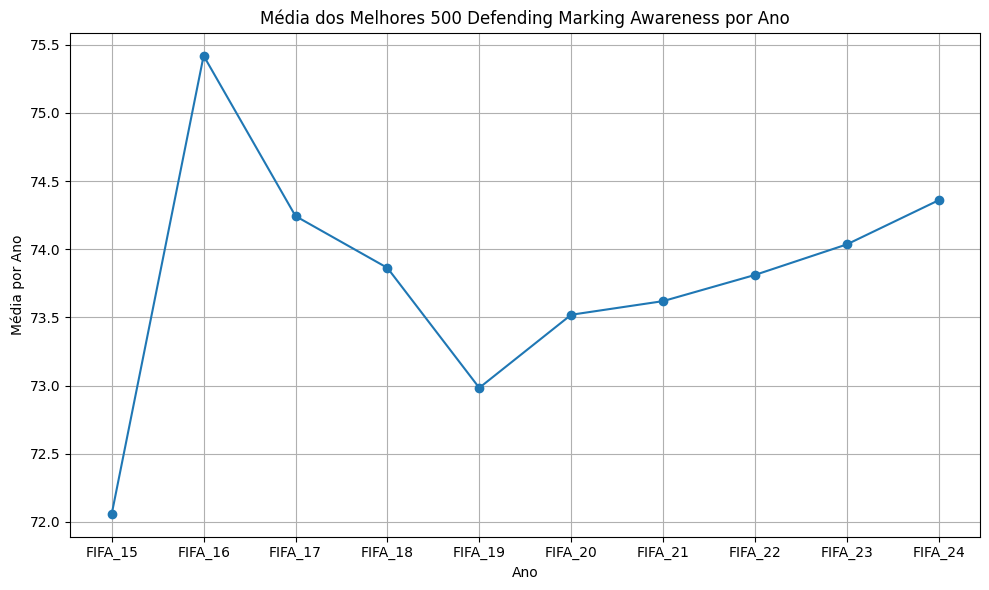

In [22]:
fun.PlotLineGraph(nocao_defensiva_df,"Defending Marking Awareness")

#### 4.4.4. Meias 

In [23]:
passe_meias_df = fun.ComparePlayers("CM", midfield_players, "attacking_short_passing")

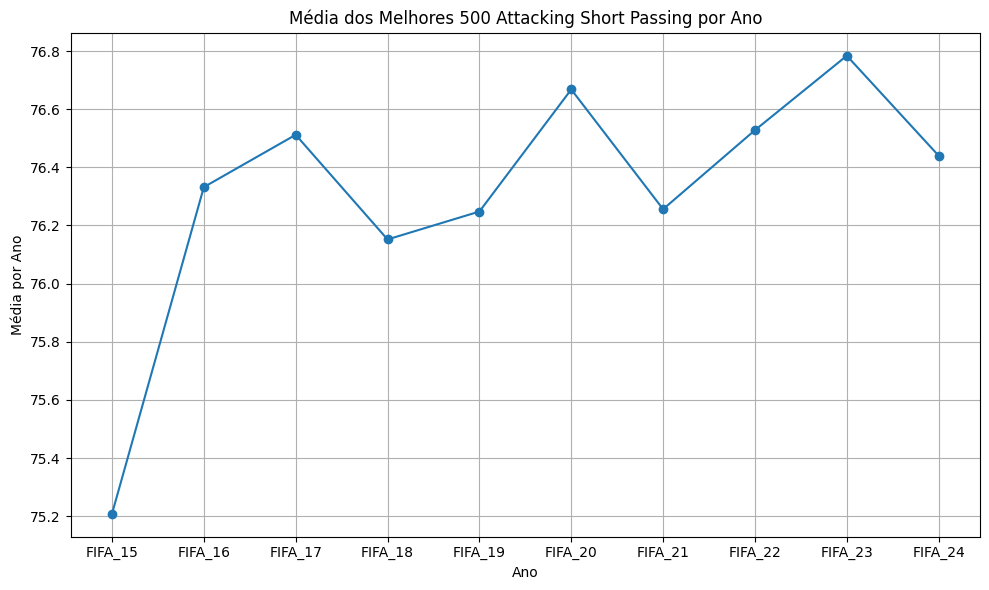

In [24]:
fun.PlotLineGraph(passe_meias_df,"Attacking Short Passing")

#### 4.4.5. Pontas Direita

In [119]:
drible_pontasD_df = fun.ComparePlayers("RW", attack_players, "dribbling")


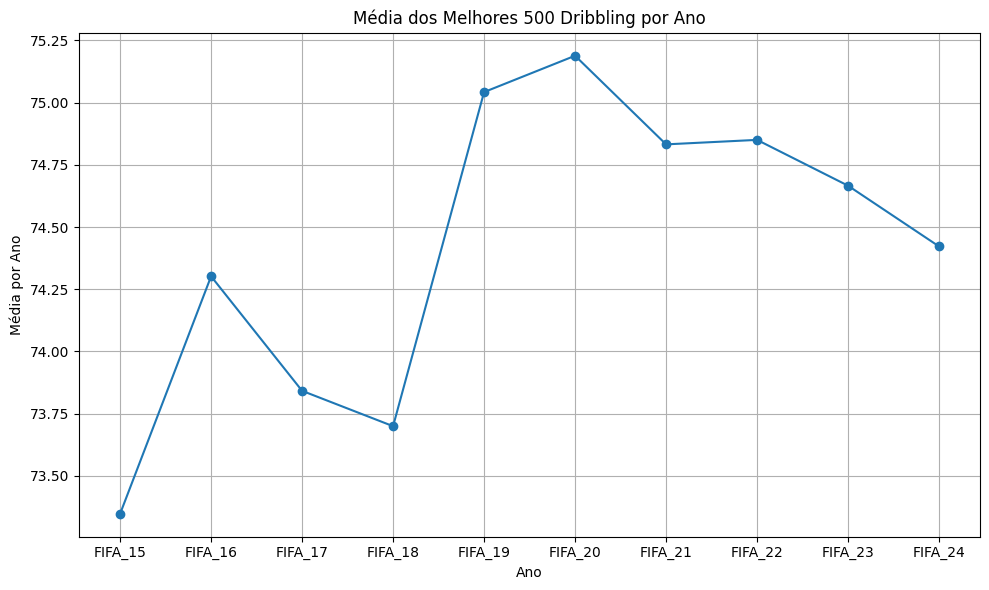

In [120]:
fun.PlotLineGraph(drible_pontasD_df, "Dribbling")

#### 4.4.6. Laterais Direito

In [117]:
pace_lateraisD_df = fun.ComparePlayers("RB", defense_players, "movement_sprint_speed")

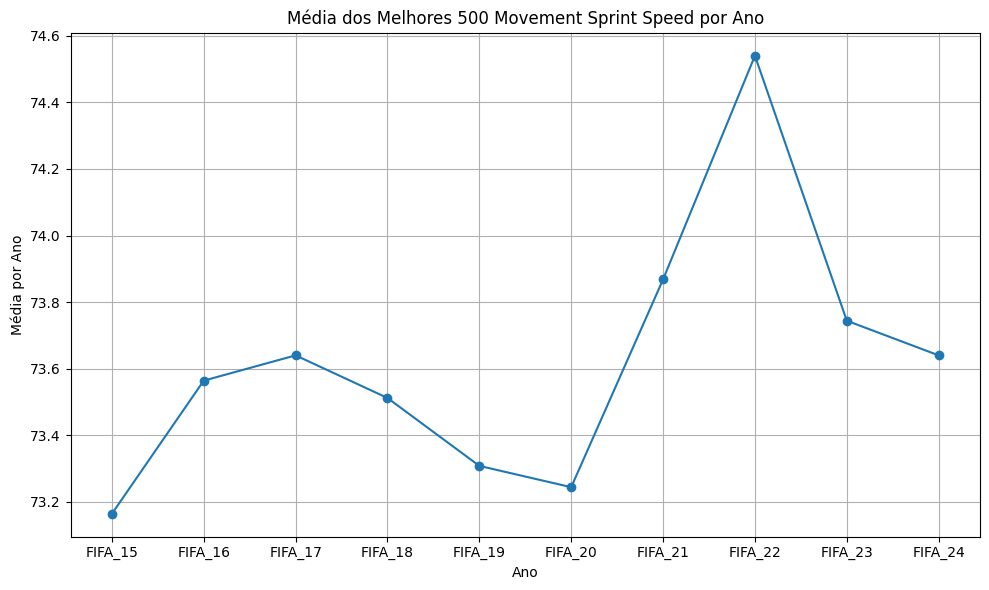

In [118]:
fun.PlotLineGraph(pace_lateraisD_df, "Movement Sprint Speed")

### 4.5 Explorando Agrupamentos

#### 4.5.1. Centroavantes vs Goleiros

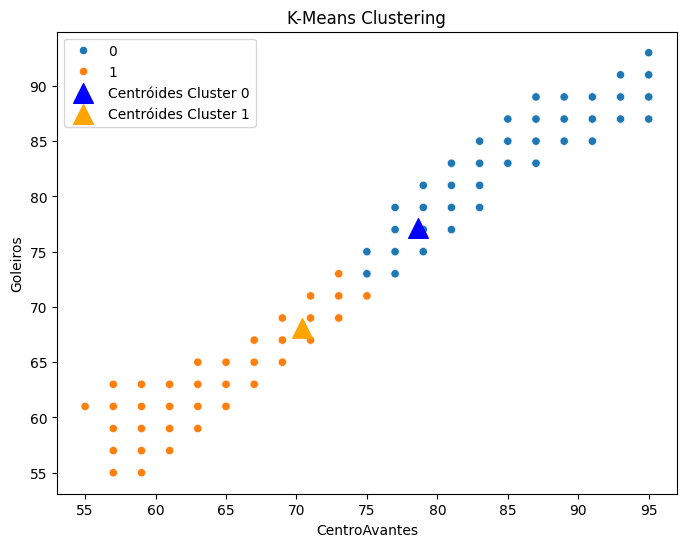

In [77]:

Antagonics(attack_finishing_df,goal_reflexes_df,"CentroAvantes","Goleiros")

#### 4.5.2. Zagueiros vs Meias

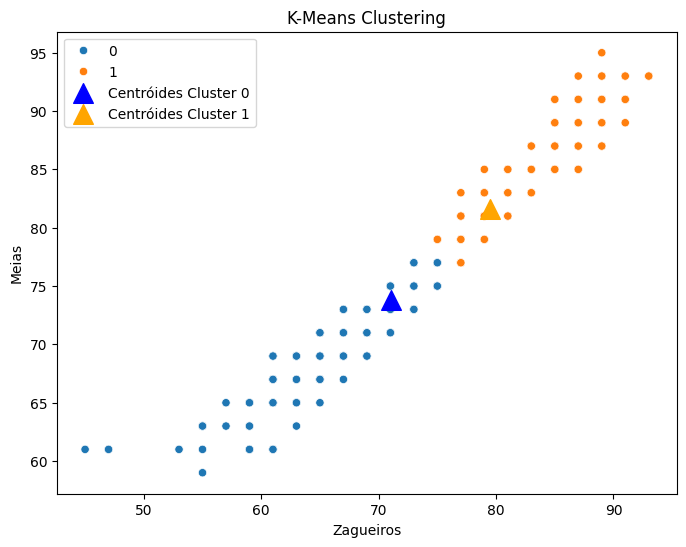

In [97]:
Antagonics(nocao_defensiva_df,passe_meias_df, "Zagueiros", "Meias")

#### 4.5.3. Laterais vs Pontas

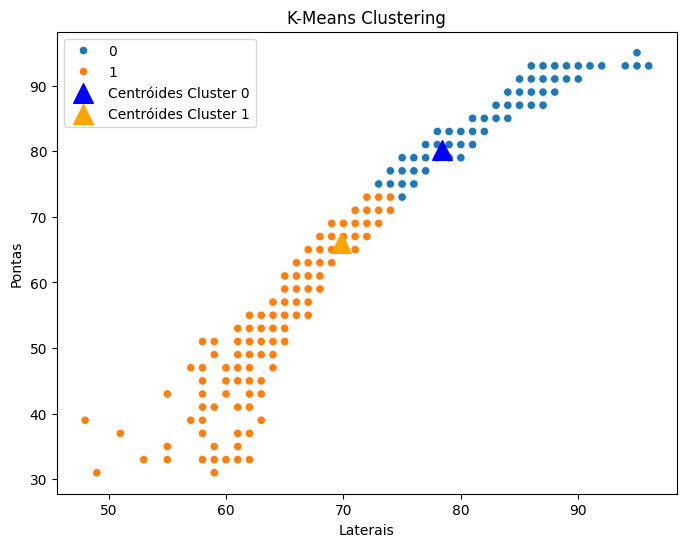

In [122]:
#Por uma questão de erro optei por transformar nessa etapa o dataset de pontas apenas para int
drible_pontasD_df = drible_pontasD_df.astype(int)

Antagonics(drible_pontasD_df,pace_lateraisD_df,"Laterais","Pontas")